# **Time Series Forecasting Project**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_csv('ElectricityC.zip',sep=';')

In [ ]:
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df1.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## **Columns Description**

| **Column Name**             | **Detailed Description**                                                                                                                                                                                                                                                       |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Date**                    | This column contains the **calendar date** in the format **dd/mm/yyyy** (e.g., 16/12/2006 for December 16, 2006). It helps identify **when** the power consumption data was recorded.                                                                                          |
| **Time**                    | This column contains the **exact time of the day** in **hh\:mm\:ss** format (e.g., 17:24:00 means 5:24 PM). It pairs with the Date column to timestamp each data entry.                                                                                                        |
| **Global\_active\_power**   | Represents the **total active power** consumed in the household at a given time, measured in **kilowatts (kW)**. Active power is the power that actually does useful work (like running appliances). This is usually the key variable for analyzing energy consumption.        |
| **Global\_reactive\_power** | This is the **reactive power** used by the household in **kilowatts (kW)**. Reactive power doesn’t do actual work but is necessary for maintaining the electric and magnetic fields in devices like motors and transformers. High reactive power can reduce energy efficiency. |
| **Voltage**                 | Indicates the **electrical potential difference** supplied to the house in **volts (V)**. Normal household voltage is typically around 220-240 V. Fluctuations might indicate issues with power supply quality.                                                                |
| **Global\_intensity**       | Measures the **electrical current drawn** by the household in **amperes (A)**. It's the total current flowing through the electrical circuits, giving an idea of how "intense" the usage is.                                                                                   |
| **Sub\_metering\_1**        | Captures the **energy consumption in the kitchen**, specifically from appliances like the **dishwasher, oven, and microwave**. The unit is **watt-hours (Wh)**, meaning the amount of energy consumed over time.                                                               |
| **Sub\_metering\_2**        | Captures the **energy used in the laundry room**, including appliances like **washing machine, tumble dryer, refrigerator**, and lights. Also measured in **watt-hours (Wh)**.                                                                                                 |
| **Sub\_metering\_3**        | Measures **energy used by the water heater and air conditioner**. These are heavy-load devices and typically contribute significantly to the energy bill. Also in **watt-hours (Wh)**.                                                                                         |


In [ ]:
df1.shape

(2075259, 9)

**There are 20 lacs+ rows with 9 columns in the dataset.**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB




1.  **Will convert the date column to datetime format.**
2.   **It seems that there are inconsistency in columns becoz numerical columns are also as object type in the dataset. We will convert it back to numerical dtype.**











In [ ]:
df=df1[["Date","Time","Global_active_power"]]

In [ ]:
# Combine and convert to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

In [ ]:
df["Global_active_power"]=pd.to_numeric(df["Global_active_power"],errors='coerce')

## **Handling Missing Values**

In [ ]:
df.isnull().sum()

,0
Global_active_power,25979


In [ ]:
print(2597900/2075259, "% missing values in the dataset")

1.2518437457686005 % missing values in the dataset


**Since it is less than 5% hence we will drop the missing values.**

<Axes: >

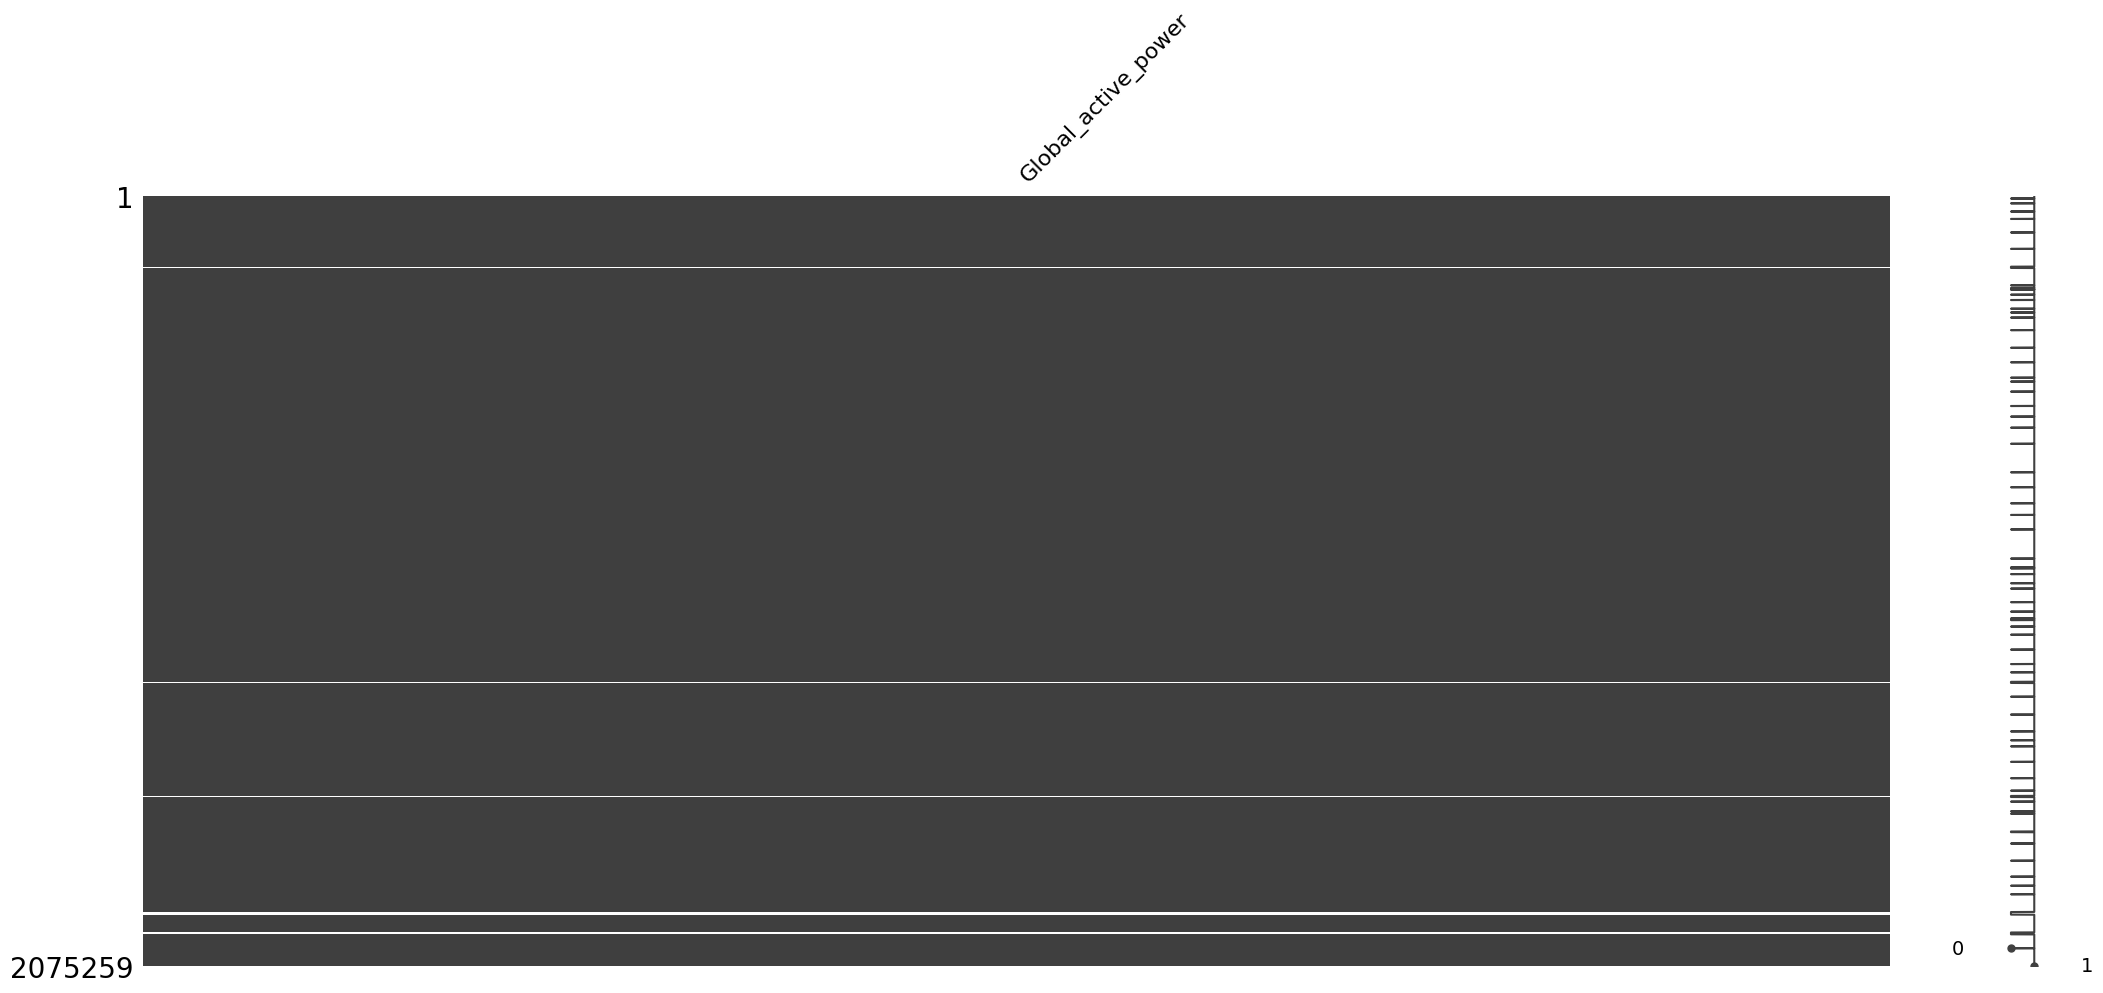

In [ ]:
import missingno as mn
mn.matrix(df)

In [ ]:
df.dropna(inplace=True)
#df = df.interpolate()

## **Resampling to Weekly Data**

In [ ]:
df_weekly = df.resample('W').sum()

In [ ]:
df_weekly.head()

,Global_active_power
Datetime,
2006-12-17,4599.636
2006-12-24,17477.128
2006-12-31,19736.518
2007-01-07,14961.068
2007-01-14,16176.334


In [ ]:
df_weekly.isnull().sum()

,0
Global_active_power,0


In [ ]:
df_weekly.columns=["EC"]
df_weekly.shape

(207, 1)

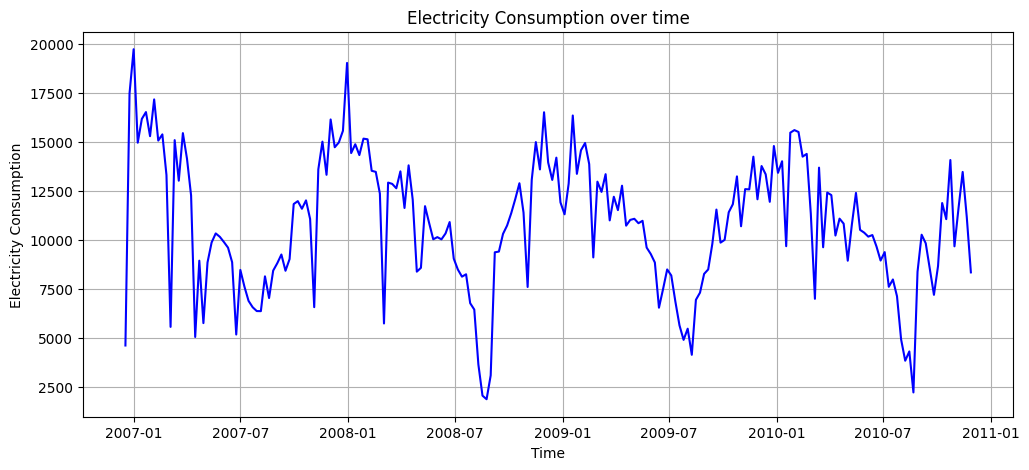

In [ ]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(df_weekly.index,df_weekly["EC"],color="blue",label="Initial plot")
ax.set_xlabel('Time')
ax.set_ylabel("Electricity Consumption")
ax.set_title("Electricity Consumption over time")
plt.grid(True)
plt.show()

**Series seems stationary in nature & also reflecting seasonal bahaviour.**

## **Decomposition of the Series**

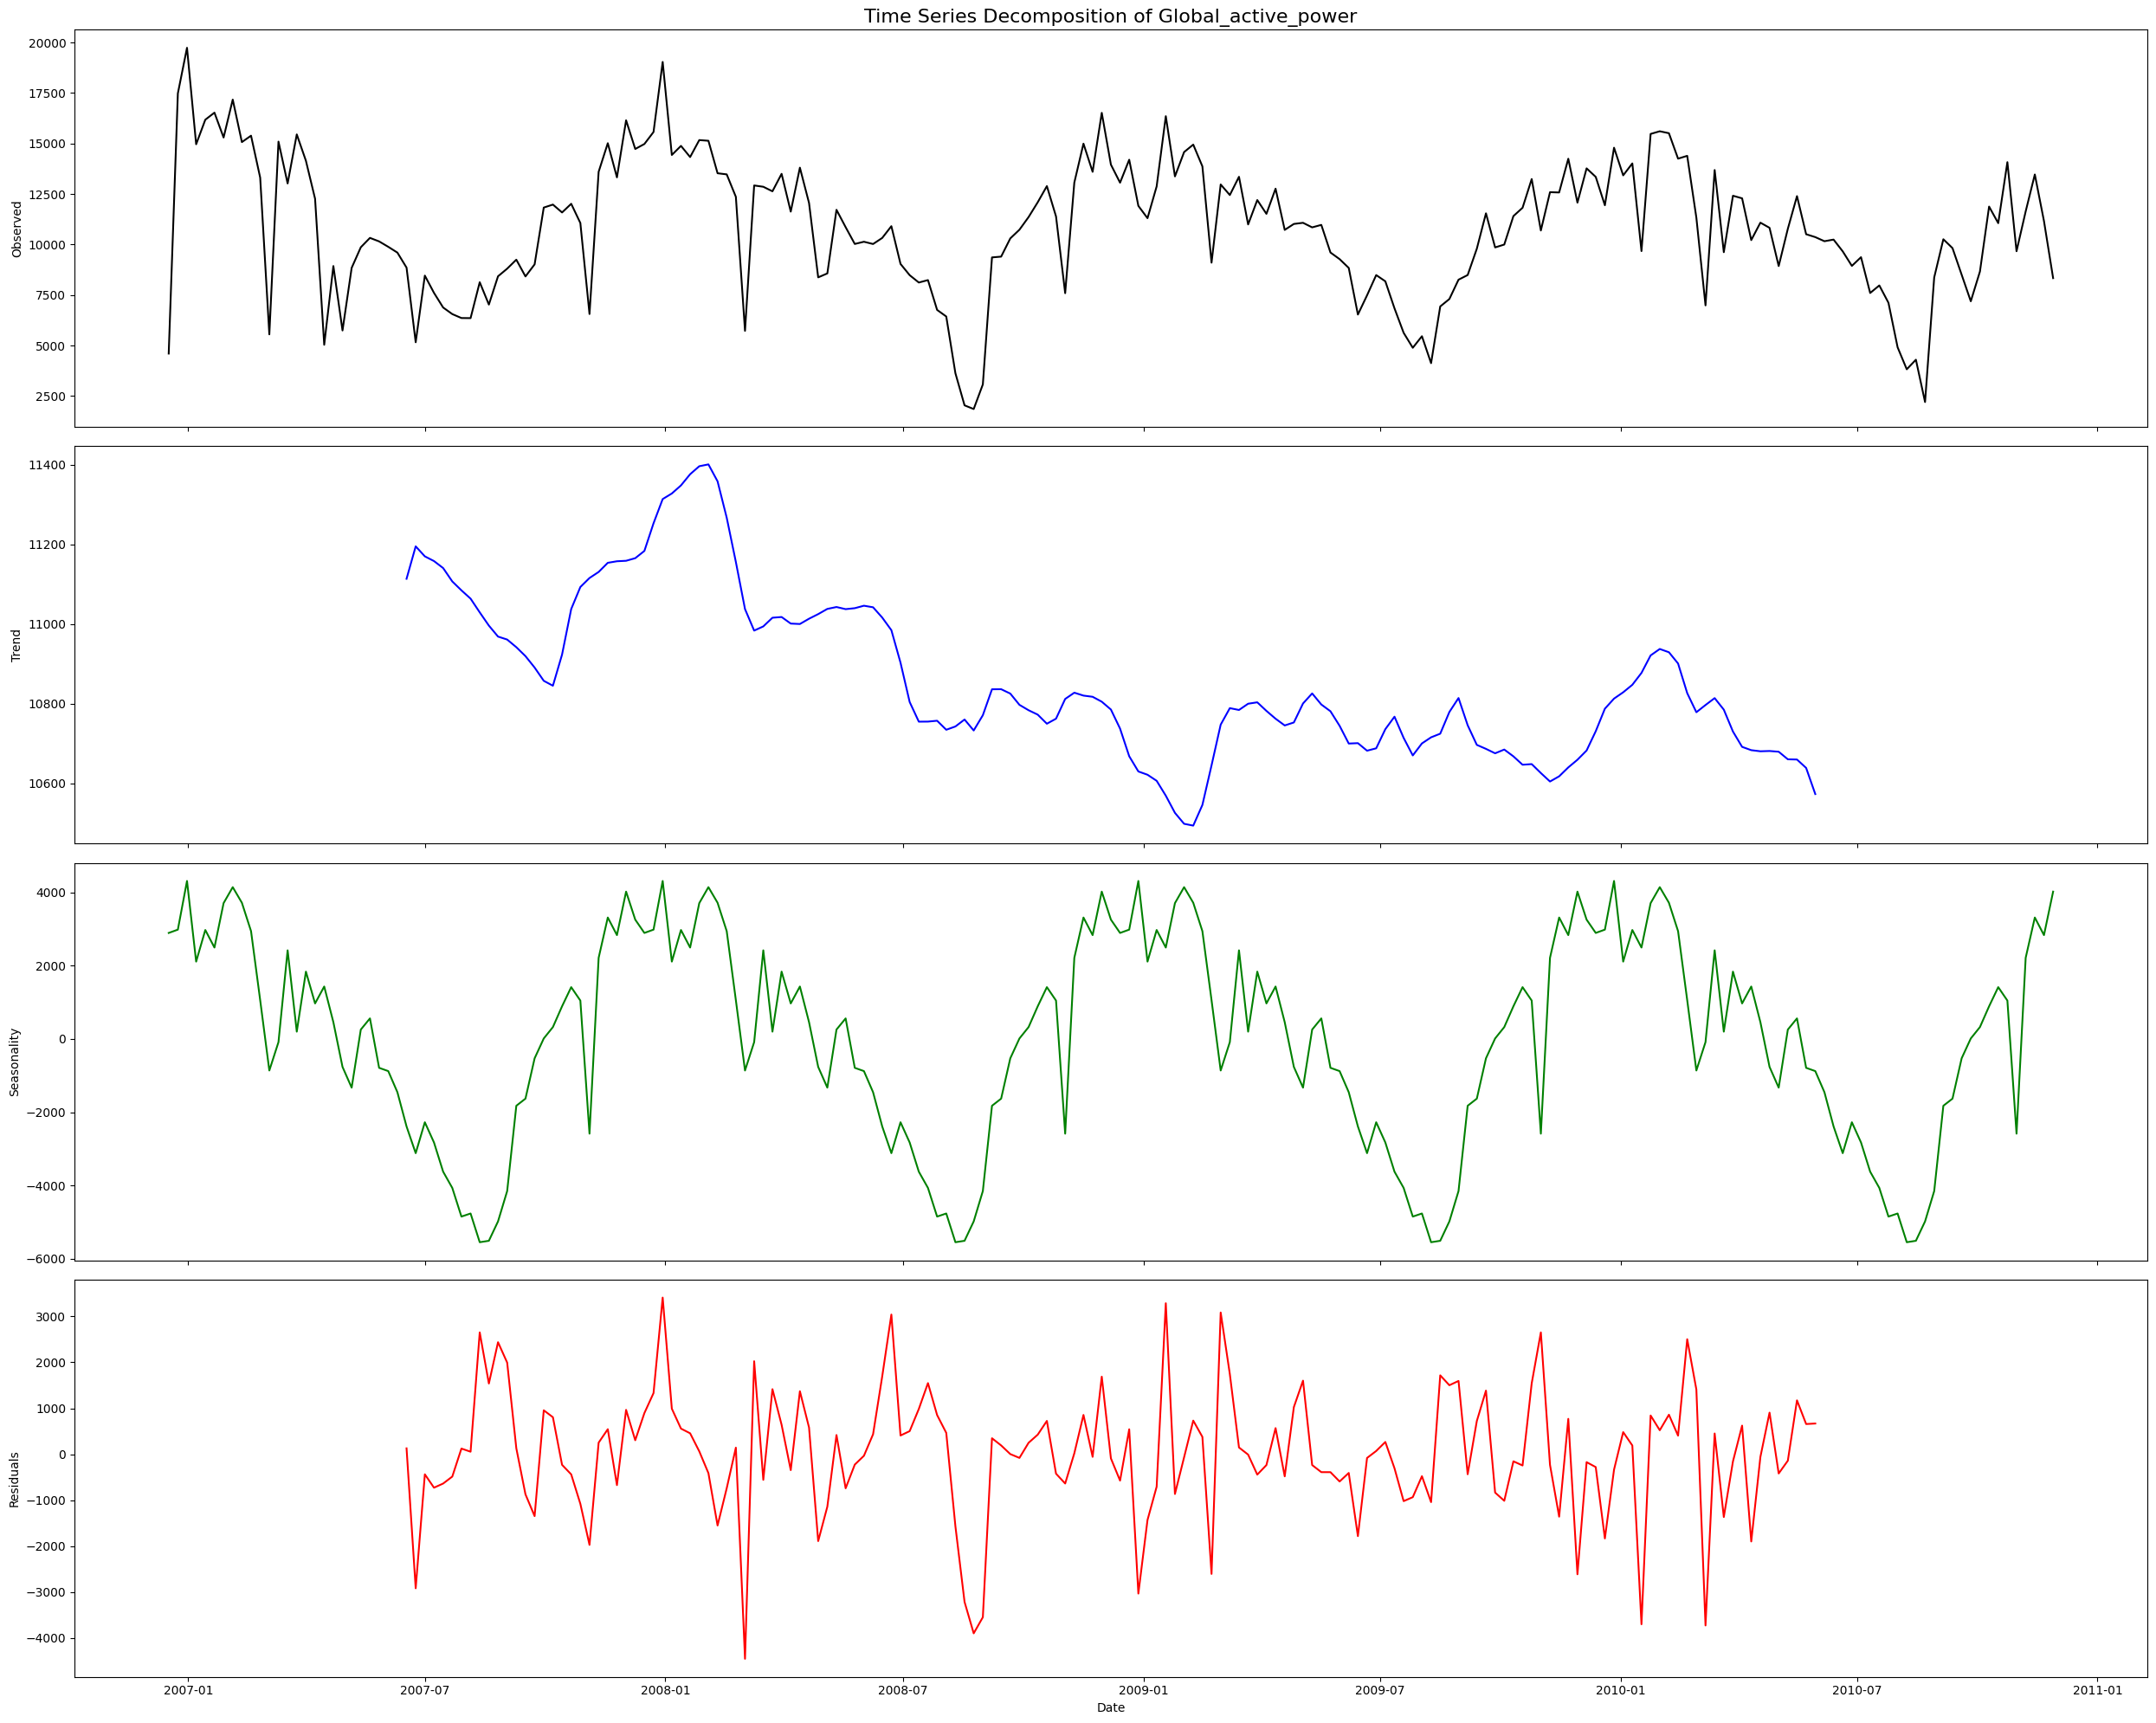

In [ ]:
# Decompose the series
from statsmodels.tsa.seasonal import STL , seasonal_decompose
result = seasonal_decompose(df_weekly['EC'], model='additive', period=52)

# Custom large plots
fig, axes = plt.subplots(4, 1, figsize=(25, 20), sharex=True)

# Plot observed
axes[0].plot(result.observed, color='black')
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition of Global_active_power", fontsize=16)

# Plot trend
axes[1].plot(result.trend, color='blue')
axes[1].set_ylabel("Trend")

# Plot seasonal
axes[2].plot(result.seasonal, color='green')
axes[2].set_ylabel("Seasonality")

# Plot residual
axes[3].plot(result.resid, color='red')
axes[3].set_ylabel("Residuals")
axes[3].set_xlabel("Date")

plt.tight_layout()
plt.show()

**It is clear that yearly seasonality is present in the series**

## **Testing for Seasonality**

In [ ]:
import plotly.express as px
# Perform Fourier Transform
fft_vals = np.fft.fft(df_weekly['EC'])
fft_freqs = np.fft.fftfreq(len(df_weekly))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

In [ ]:
1/0.01932367

51.75000401062531

**we found a higher spike on 0.01932367 which is nothing but 1/52. Hence here in the weekly data yearly seasonality is present.**

## **ADF Test For Stationarity**

In [ ]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_weekly['EC'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.302692
p-value: 0.000439


**p value < 0.05 hence the Time Series is Stationary**

## **ACF Plot**

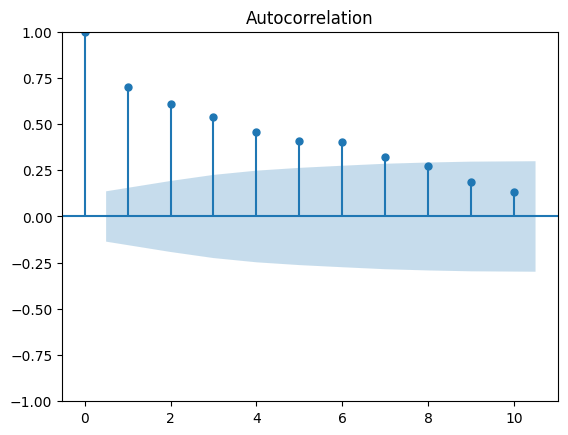

In [ ]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_weekly["EC"],lags=10)
plt.show()

**Clearly exponential decay in ACF plot hence series is not a purely MA(q) process.**

## **PACF Plot**

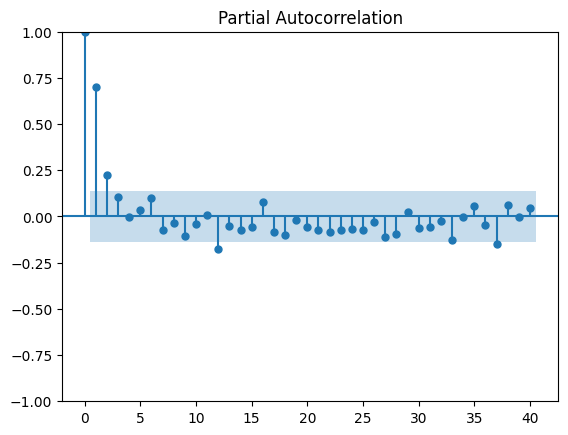

In [ ]:
# pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_weekly['EC'],lags=40)
plt.show()

**PACF plot indicates that this series might be AR(2) process.**

## **Towards Model Building**

In [ ]:
# spliting
train = df_weekly[:int(0.95*(len(df_weekly)))]
test = df_weekly[int(0.95*(len(df_weekly))):]

In [ ]:
train.shape

(196, 1)

# **ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

### **Finding the best ARIMA model**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
l=[]
def models(p,q):
    model = ARIMA(train['EC'], order=(p,0,q))
    m=model.fit()
    l.append([[(p,0,q)],m.aic])


In [ ]:
from itertools import product
p = range(0, 6)
q = range(0, 6)

In [ ]:
for p,q in product(p,q):
   models(p,q)

In [ ]:
d=pd.DataFrame(l,columns=["Model","AIC"])
data=d.sort_values(by="AIC",ascending=True)
data.head(5)

,Model,AIC
17,"[(2, 0, 5)]",3580.623797
23,"[(3, 0, 5)]",3585.589613
21,"[(3, 0, 3)]",3600.296919
27,"[(4, 0, 3)]",3601.521034
22,"[(3, 0, 4)]",3601.931163


### **Fitting ARIMA(2,0,5) Model**

In [ ]:
#fitting ARIMA(2,0,5)
model = ARIMA(train['EC'], order=(2,0,5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     EC   No. Observations:                  196
Model:                 ARIMA(2, 0, 5)   Log Likelihood               -1781.312
Date:                Fri, 18 Jul 2025   AIC                           3580.624
Time:                        11:20:22   BIC                           3610.127
Sample:                    12-17-2006   HQIC                          3592.568
                         - 09-12-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.082e+04    200.143     54.079      0.000    1.04e+04    1.12e+04
ar.L1          1.9846      0.002   1206.043      0.000       1.981       1.988
ar.L2         -0.9988      0.001   -676.657      0.0

### **Model Diagnostics**

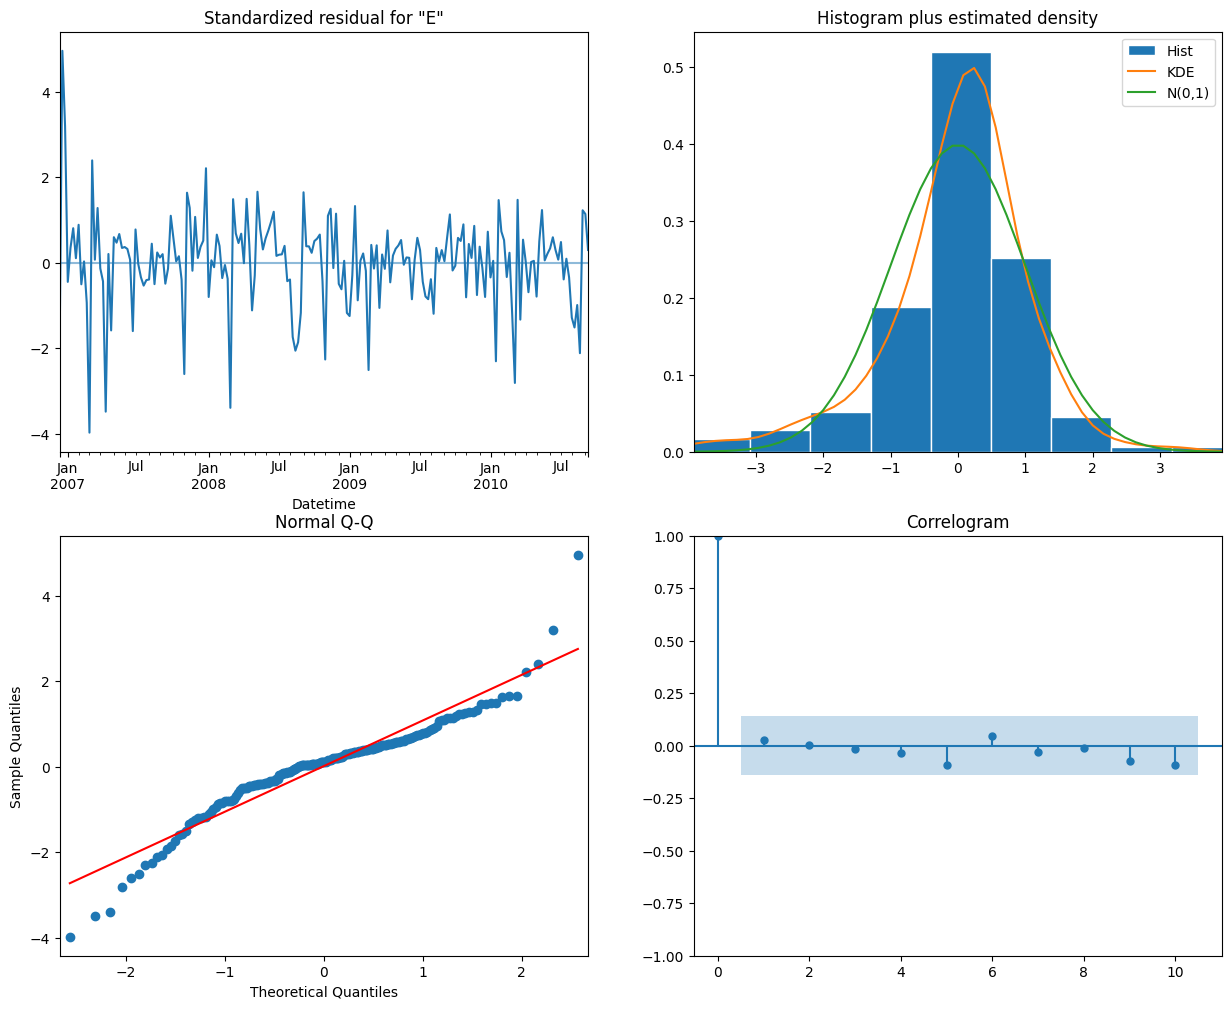

In [ ]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

**According to the qualitative analysis, residuals approximately resemble white noise.**

## **Ljung Box Test**

In [ ]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model_fit.resid, lags=50)
lb_test.head(10)

,lb_stat,lb_pvalue
1,0.002163,0.962907
2,0.052353,0.974163
3,0.088128,0.993223
4,0.314838,0.988836
5,2.062428,0.840441
6,2.612314,0.855692
7,2.845476,0.898920
8,2.848122,0.943524
9,4.236804,0.895147
10,5.878087,0.825400


**p values indicates that residuals are normal & not autocorrelated**











## **Forecasting through ARIMA(2,0,5) Model**

In [ ]:
# Predict on training data (in-sample fit)
train_preds = model_fit.fittedvalues

# Predict on test data (out-of-sample forecast)
test_preds = model_fit.forecast(steps=len(test))


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual train
fig.add_trace(go.Scatter(x=train.index, y=train['EC'], mode='lines', name='Observed - Train'))

# Actual test
fig.add_trace(go.Scatter(x=test.index, y=test['EC'], mode='lines', name='Observed - Test'))

# Predicted train
fig.add_trace(go.Scatter(x=train.index, y=train_preds, mode='lines', name='Predicted - Train'))

# Predicted test
fig.add_trace(go.Scatter(x=test.index, y=test_preds, mode='lines', name='Predicted - Test'))

# Layout
fig.update_layout(
    title='Observed vs Predicted EC (Train & Test)',
    xaxis_title='Date',
    yaxis_title='EC'
)

fig.show()

In [ ]:
arima_mape=np.mean(np.abs(model_fit.predict(start=len(train),end=len(df_weekly)-1)-test['EC'])/np.abs(test['EC']))

In [ ]:
arima_mape

np.float64(0.1781777528650964)

# **SARIMA**

In [ ]:
#Sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
l=[]
def models(p,q,P,Q):
    model=SARIMAX(train,order=(p,0,q),
                       seasonal_order=(P,0,Q,52))
    try:
        m=model.fit()
        l.append([[(p,0,q),(P,0,Q)],m.aic,np.mean(np.abs(m.predict(start=len(train),end=len(df_weekly)-1)-test['EC'])/np.abs(test['EC']))])
    except:
        print("Error in fitting model for parameters: ", (p,0,q), (P,0,Q))
        pass

In [ ]:
from itertools import product
p = range(0, 3)
q = range(0, 3)
P = range(0, 2)
Q = range(0, 2)

In [ ]:
for params in set(product(p,q,P,Q)):
   models(*params)

In [ ]:
d=pd.DataFrame(l,columns=["Model","AIC","MAPE"])
data=d.sort_values(by="AIC",ascending=True)
data.head(10)

,Model,AIC,MAPE
24,"[(2, 0, 2), (1, 0, 0)]",3600.851061,0.154902
20,"[(2, 0, 1), (1, 0, 0)]",3602.667495,0.169335
16,"[(1, 0, 1), (1, 0, 1)]",3602.790993,0.162705
29,"[(1, 0, 1), (1, 0, 0)]",3602.799110,0.164127
14,"[(1, 0, 2), (1, 0, 0)]",3603.007252,0.165691
10,"[(2, 0, 1), (1, 0, 1)]",3603.142120,0.165328
1,"[(1, 0, 2), (1, 0, 1)]",3603.468050,0.164001
35,"[(1, 0, 1), (0, 0, 1)]",3605.721377,0.174948
30,"[(2, 0, 1), (0, 0, 1)]",3606.511345,0.189689
23,"[(1, 0, 2), (0, 0, 1)]",3606.729665,0.182354


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
order = (2, 0, 2)                  # Non-seasonal (p, d, q)
seasonal_order = (1, 0, 0, 52)    # Seasonal (P, D, Q, s)

# Fit the model (enable checks for faster convergence)
model = SARIMAX(train["EC"],
                order=order,
                seasonal_order=seasonal_order
                )
results = model.fit(disp=False)

In [ ]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  EC   No. Observations:                  196
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1794.426
Date:                             Fri, 18 Jul 2025   AIC                           3600.851
Time:                                     11:56:53   BIC                           3620.520
Sample:                                 12-17-2006   HQIC                          3608.814
                                      - 09-12-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8398      0.117     15.760      0.000       1.611       2.069
ar.L2         -0.8400      

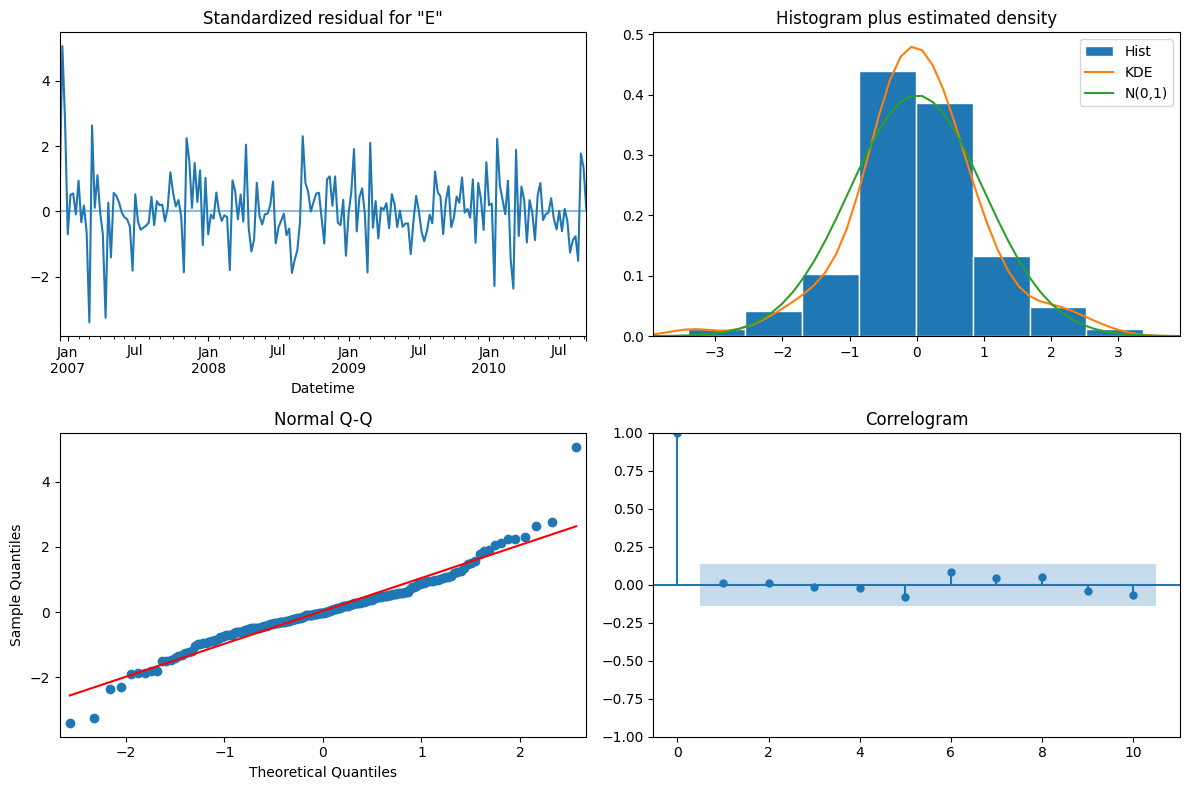

In [ ]:
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
# Ljung box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(results.resid, lags=40)
lb_test.head(12)

,lb_stat,lb_pvalue
1,0.812376,0.367419
2,1.020928,0.600217
3,1.064478,0.785656
4,1.135710,0.888566
5,2.086840,0.837003
6,3.567310,0.734994
7,4.074613,0.771145
8,4.636405,0.795636
9,5.080507,0.827234
10,6.255841,0.793330


**p values indicates that residuals are normal & not autocorrelated and hence the model is ready for predictions.**

In [ ]:
# Predict on training data (in-sample fit)
train_preds = results.fittedvalues

# Predict on test data (out-of-sample forecast)
test_preds = results.forecast(steps=len(test))


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual train
fig.add_trace(go.Scatter(x=train.index, y=train['EC'], mode='lines', name='Observed - Train'))

# Actual test
fig.add_trace(go.Scatter(x=test.index, y=test['EC'], mode='lines', name='Observed - Test'))

# Predicted train
fig.add_trace(go.Scatter(x=train.index, y=train_preds, mode='lines', name='Predicted - Train'))

# Predicted test
fig.add_trace(go.Scatter(x=test.index, y=test_preds, mode='lines', name='Predicted - Test'))

# Layout
fig.update_layout(
    title='Observed vs Predicted EC (Train & Test)',
    xaxis_title='Date',
    yaxis_title='EC'
)

fig.show()

In [ ]:
sarima_mape=np.mean(np.abs(results.predict(start=len(train),end=len(df_weekly)-1)-test['EC'])/np.abs(test['EC']))

In [ ]:
sarima_mape

np.float64(0.1549017364966099)

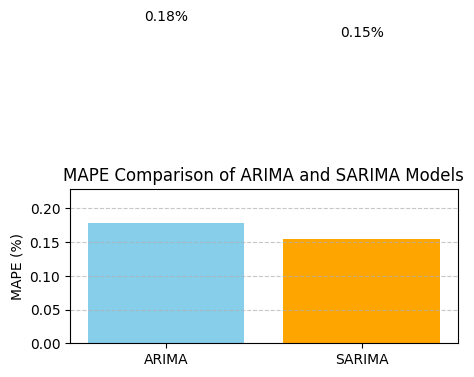

In [ ]:
models = ['ARIMA', 'SARIMA']
mape_values = [arima_mape, sarima_mape]
# Create bar plot
plt.figure(figsize=(5, 2))
bars = plt.bar(models, mape_values, color=['skyblue', 'orange'])

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}%', ha='center', fontsize=10)

# Aesthetics
plt.title('MAPE Comparison of ARIMA and SARIMA Models')
plt.ylabel('MAPE (%)')
plt.ylim(0, max(mape_values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**SARIMA overperformed the baseline model ARIMA.**

# **Fitting Deep Learning Models**

In [ ]:
## fitting deep learning models
df_hourly = df.resample('H').sum()

In [ ]:
df_hourly.columns=["EC"]
df_hourly.shape

(34589, 1)

<Axes: xlabel='Datetime'>

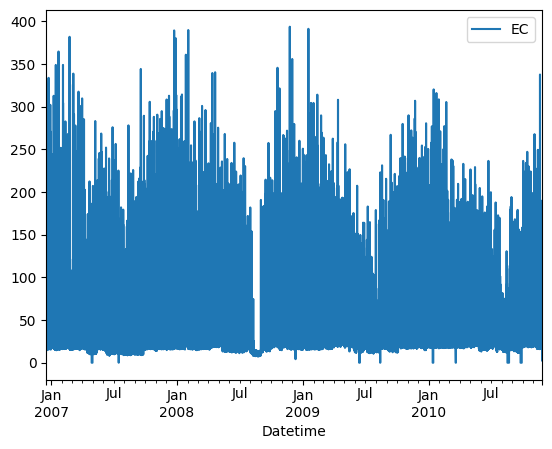

In [ ]:
df_hourly.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_hourly[['EC']])


**Neural networks work better with scaled data**

In [ ]:
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_data, time_steps)


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Dropout
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=False, input_shape=(time_steps, 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),   # Added dense layer
    Dropout(0.2),
    Dense(16, activation='relu'),   # Another dense layer
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0129 - val_loss: 0.0069
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0094 - val_loss: 0.0066
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0093 - val_loss: 0.0061
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0090 - val_loss: 0.0061
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0090 - val_loss: 0.0061
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0088 - val_loss: 0.0060
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0085 - val_loss: 0.0060
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0089 - val_loss: 0.0059
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0085 - val_loss: 0.0062
Epoch 12/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8m

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(64, activation='relu', return_sequences=False, input_shape=(time_steps, 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),   # Added dense layer
    Dropout(0.2),
    Dense(16, activation='relu'),   # Another dense layer

    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0173 - val_loss: 0.0068
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0104 - val_loss: 0.0066
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0094 - val_loss: 0.0066
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0093 - val_loss: 0.0069
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0092 - val_loss: 0.0065
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0091 - val_loss: 0.0064
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 12/20
864/864 ━━━━━━━━━━

In [ ]:
pred_lstm = model_lstm.predict(X_test)
pred_rnn = model_rnn.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)
pred_rnn_inv = scaler.inverse_transform(pred_rnn)


216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


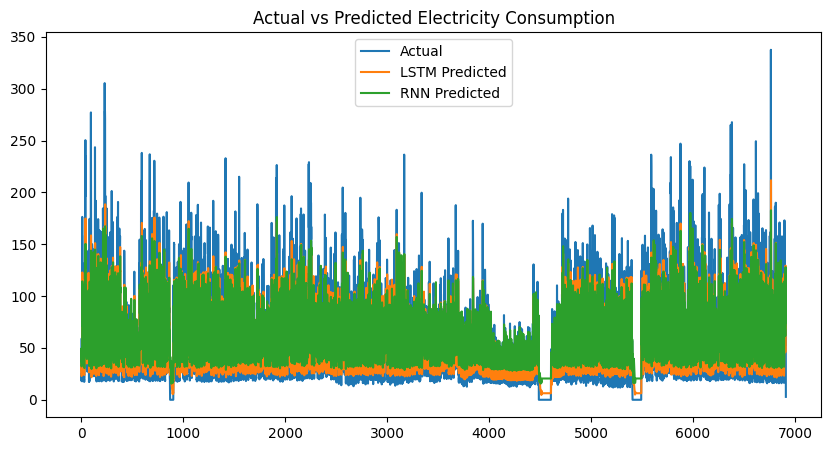

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(pred_lstm_inv, label='LSTM Predicted')
plt.plot(pred_rnn_inv, label='RNN Predicted')
plt.legend()
plt.title('Actual vs Predicted Electricity Consumption')
plt.show()


In [ ]:
def mape(y_true, y_pred):
    epsilon = 1e-1
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))

print("LSTM MAPE:", mape(y_test_inv, pred_lstm_inv))
print("RNN MAPE:", mape(y_test_inv, pred_rnn_inv))


LSTM MAPE: 3.7840454214831403
RNN MAPE: 8.099402165843935


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

model_bilstm = Sequential([
    Bidirectional(LSTM(128, activation='relu'), input_shape=(time_steps, 1)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

model_bilstm.compile(optimizer='adam', loss='mse')
model_bilstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 63s 69ms/step - loss: 0.0121 - val_loss: 0.0063
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - loss: 0.0089 - val_loss: 0.0062
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - loss: 0.0086 - val_loss: 0.0059
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - loss: 0.0083 - val_loss: 0.0061
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - loss: 0.0084 - val_loss: 0.0058
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - loss: 0.0082 - val_loss: 0.0060
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 60s 69ms/step - loss: 0.0083 - val_loss: 0.0060
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - loss: 0.0082 - val_loss: 0.0059
Epoch 12/20
864/864 ━━━━━━━━━━

In [ ]:
pred_bilstm = model_bilstm.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
pred_bilstm_inv = scaler.inverse_transform(pred_bilstm)
print("BiLSTM MAPE:", mape(y_test_inv, pred_bilstm_inv))


216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
BiLSTM MAPE: 346555617443.209


In [ ]:
# Assuming predictions are already made
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)
pred_bilstm = model_bilstm.predict(X_test)

# Inverse transform all predictions and y_test
pred_rnn_inv = scaler.inverse_transform(pred_rnn)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)
pred_bilstm_inv = scaler.inverse_transform(pred_bilstm)
y_test_inv = scaler.inverse_transform(y_test)


216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


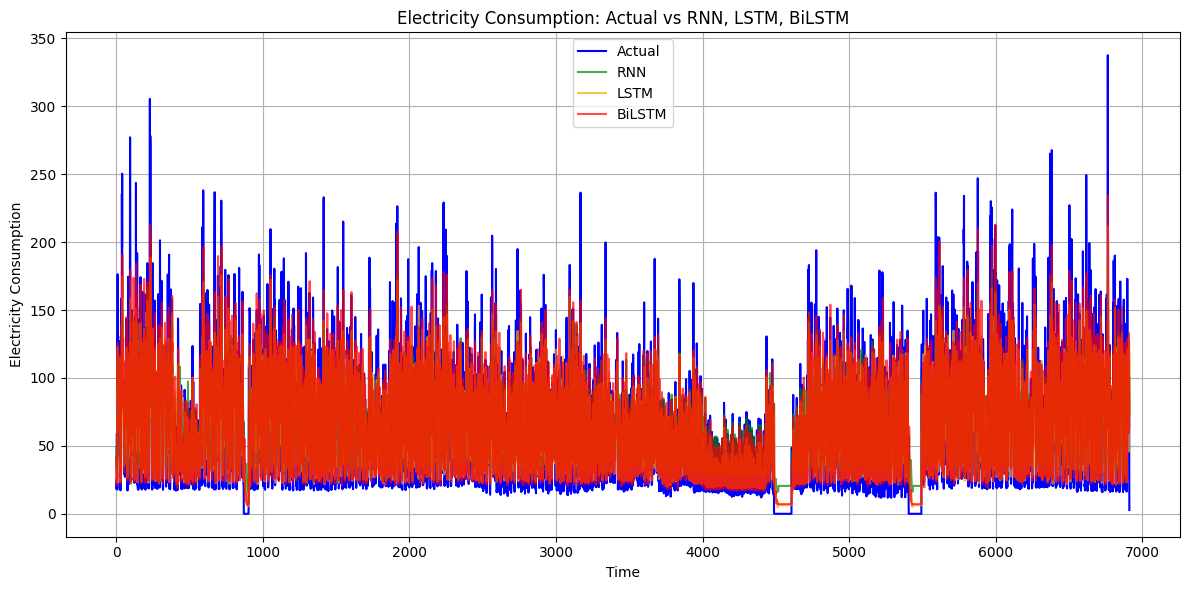

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot actual values
plt.plot(y_test_inv, label='Actual', color='blue')

# Plot predictions
plt.plot(pred_rnn_inv, label='RNN', color='green', alpha=0.7)
plt.plot(pred_lstm_inv, label='LSTM', color='orange', alpha=0.7)
plt.plot(pred_bilstm_inv, label='BiLSTM', color='red', alpha=0.7)

plt.title('Electricity Consumption: Actual vs RNN, LSTM, BiLSTM')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def mape(y_true, y_pred):
    epsilon = 1e-10  # small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Compute MAPE scores
mape_rnn = mape(y_test_inv, pred_rnn_inv)
mape_lstm = mape(y_test_inv, pred_lstm_inv)
mape_bilstm = mape(y_test_inv, pred_bilstm_inv)


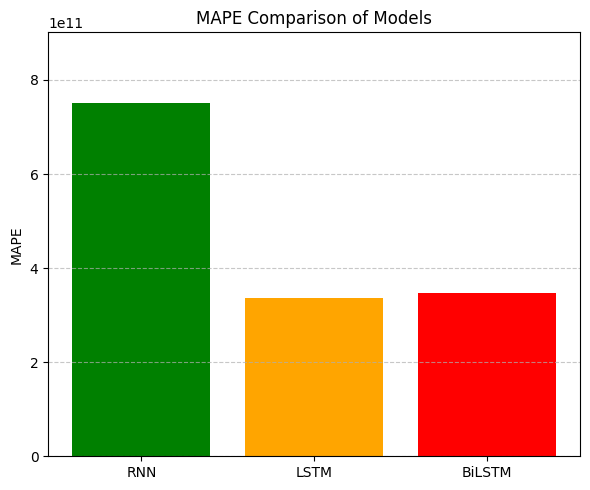

In [ ]:
import matplotlib.pyplot as plt

# Model names and scores
models = ['RNN', 'LSTM', 'BiLSTM']
mape_scores = [mape_rnn, mape_lstm, mape_bilstm]

# Plot
plt.figure(figsize=(6,5))
bars = plt.bar(models, mape_scores, color=['green', 'orange', 'red'])

# Annotate bars with MAPE values
for bar in bars:
    height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}", ha='center', va='bottom')

plt.title('MAPE Comparison of Models')
plt.ylabel('MAPE')
plt.ylim(0, max(mape_scores)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**LSTM outperforms other deep learning models.**

Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 59s 68ms/step - loss: 0.0078 - val_loss: 0.0056
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - loss: 0.0076 - val_loss: 0.0058
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 59s 68ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 12/20
864/864 ━━━━━━━━━━

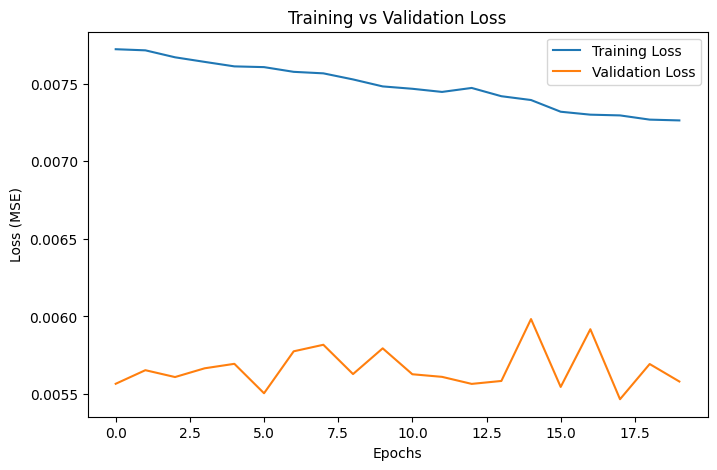

In [ ]:
import matplotlib.pyplot as plt

# Assuming you trained the model as: history = model.fit(...)
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

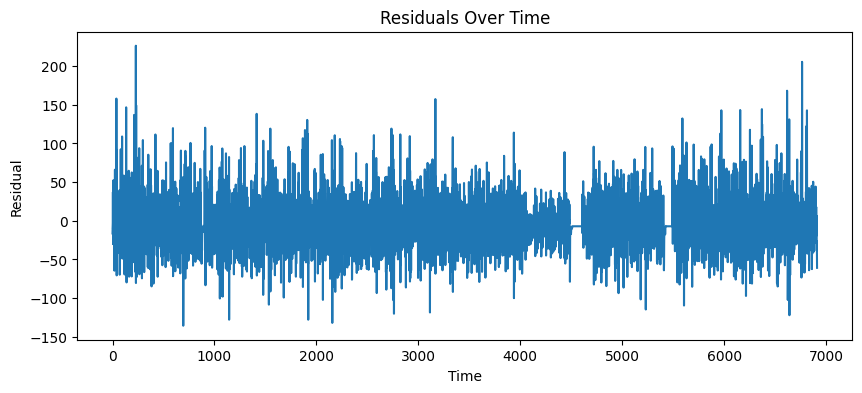

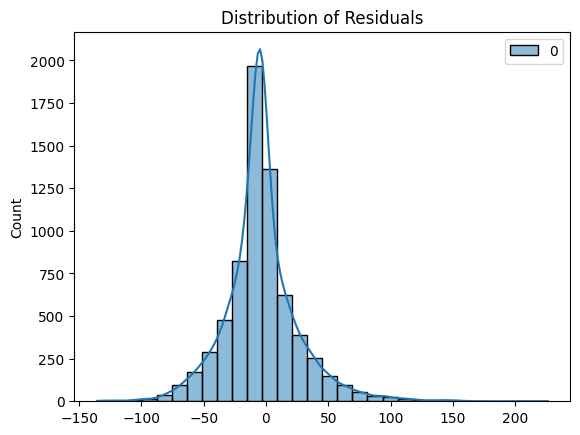

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are numpy arrays
residuals = y_test_inv - pred_bilstm_inv

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.show()
